## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
import pandas as pd
import numpy as np a
import matplotlib.pyplot as plt


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
data = pd.read_csv('mobile_prices_2023.csv')
data.head(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
5,"POCO M4 5G (Power Black, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
7,"POCO C55 (Forest Green, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
8,"POCO C55 (Cool Blue, 128 GB)",4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249",2023-06-17
9,"POCO M4 5G (Yellow, 128 GB)",4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",2023-06-17


# 1. About the Data


In [17]:
mobile_data = data #copy the data 
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [18]:
mobile_data['Price in INR'].describe()

count       1836
unique       519
top       ₹9,999
freq          47
Name: Price in INR, dtype: object

In [19]:
mobile_data.shape

(1836, 11)

In [20]:
mobile_data.dtypes.value_counts()

object     10
float64     1
dtype: int64

# Data Cleaning Part 



## check for null values 

In [21]:
mobile_data.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [22]:
mobile_data=mobile_data.dropna()

In [23]:
mobile_data.shape

(1291, 11)

## Handling the Duplicates

In [24]:
mobile_data.index.is_unique

True

The index.is_unique value returns True that means there are no duplicates values in our mobile dataset 

In [25]:
mobile_data.head(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
5,"POCO M4 5G (Power Black, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
7,"POCO C55 (Forest Green, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
8,"POCO C55 (Cool Blue, 128 GB)",4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249",2023-06-17
9,"POCO M4 5G (Yellow, 128 GB)",4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",2023-06-17


In [27]:
X_data = mobile_data.drop('Price in INR', axis=1)
y_data = mobile_data['Price in INR']

In [28]:
X_data.shape

(1291, 10)

In [29]:
y_data.shape

(1291,)

In [33]:
y_data.dtype

dtype('O')

## Transform y_data obj--> float

In [50]:
mobile_data['Price in INR']

0        ₹5,649
1       ₹11,999
2        ₹6,999
3        ₹7,749
4        ₹6,999
         ...   
1831    ₹14,999
1832    ₹14,999
1833    ₹14,999
1834    ₹18,999
1835    ₹10,999
Name: Price in INR, Length: 1291, dtype: object

In [38]:
def remove_rupee_sign(data):
    return [item.replace('₹', '') for item in data]

In [51]:
cleaned_data_set = remove_rupee_sign(mobile_data['Price in INR'])

In [52]:
mobile_data['Price in INR']= cleaned_data_set
mobile_data['Price in INR']

C:\Users\Bishwanath Jana\AppData\Local\Temp\ipykernel_15612\191916712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_data['Price in INR']= cleaned_data_set


0        5,649
1       11,999
2        6,999
3        7,749
4        6,999
         ...  
1831    14,999
1832    14,999
1833    14,999
1834    18,999
1835    10,999
Name: Price in INR, Length: 1291, dtype: object

In [53]:
mobile_data['Price in INR'] = mobile_data['Price in INR'].str.replace(',', '').astype(float)

C:\Users\Bishwanath Jana\AppData\Local\Temp\ipykernel_15612\3781029139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_data['Price in INR'] = mobile_data['Price in INR'].str.replace(',', '').astype(float)


In [54]:
mobile_data['Price in INR']

0        5649.0
1       11999.0
2        6999.0
3        7749.0
4        6999.0
         ...   
1831    14999.0
1832    14999.0
1833    14999.0
1834    18999.0
1835    10999.0
Name: Price in INR, Length: 1291, dtype: float64

In [55]:
y_data = mobile_data['Price in INR']

In [56]:
y_data.dtypes

dtype('float64')

In [57]:
y_data[:10]

0     5649.0
1    11999.0
2     6999.0
3     7749.0
4     6999.0
5    11999.0
6     7749.0
7     7749.0
8     9249.0
9    13999.0
Name: Price in INR, dtype: float64

# Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

In [66]:
lst=["Phone Name","Rating ?/5" ,"Number of Ratings","RAM","ROM/Storage","Back/Rare Camera","Front Camera" ,"Battery" ,"Processor" ,"Date of Scraping"]

In [67]:
le=LabelEncoder()

In [68]:
for i in lst:
    X_data[i]=le.fit_transform(X_data[i])
X_data

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Date of Scraping
0,450,8,318,4,4,144,26,65,116,0
1,493,8,481,6,7,99,31,65,102,0
2,452,9,140,6,7,145,26,65,40,0
3,454,8,227,6,7,118,26,65,122,0
4,451,9,140,6,7,145,26,65,40,0
...,...,...,...,...,...,...,...,...,...,...
1831,112,9,241,6,7,69,12,65,75,0
1832,111,9,241,6,7,69,12,65,75,0
1833,110,9,241,6,7,69,12,65,75,0
1834,151,8,460,9,1,77,10,51,80,0


# Determining Normality


In [69]:
from scipy.stats.mstats import normaltest

<AxesSubplot:>

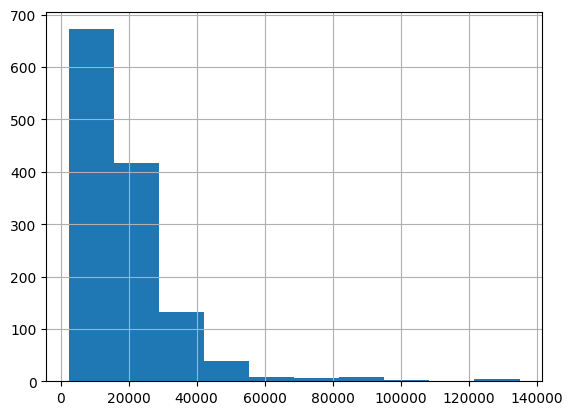

In [71]:
y_data.hist()

In [72]:
normaltest(y_data)

NormaltestResult(statistic=938.1332742111816, pvalue=1.9361894978680232e-204)

p-value extremely low. Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed:


### Testing Log transformation 

In [73]:
log_price = np.log(y_data)

<AxesSubplot:>

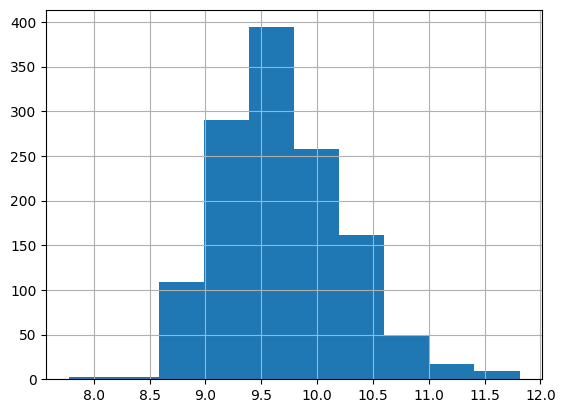

In [74]:
log_price.hist()

In [75]:
log_t_pvalue =normaltest(log_price)
log_t_pvalue

NormaltestResult(statistic=76.70745025160653, pvalue=2.2038844336558304e-17)

### Testing Square root transformation

In [76]:
sqrt_price = np.sqrt(y_data)

<AxesSubplot:>

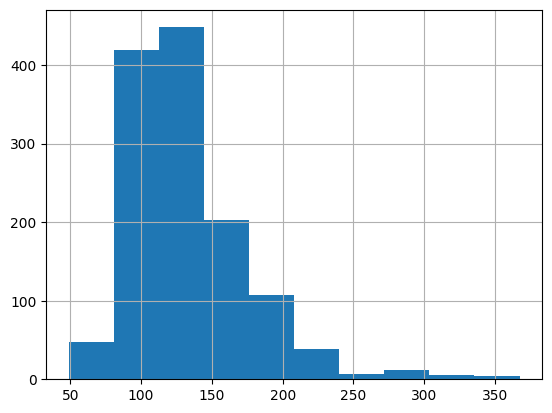

In [77]:
sqrt_price.hist()

In [78]:
normaltest(sqrt_price)

NormaltestResult(statistic=451.6857481127224, pvalue=8.273438065634487e-99)

### Box Cox


In [171]:
from scipy.stats import boxcox

In [88]:
boxcx = boxcox(y_data)
bxcx_price= boxcx[0]
lam = boxcx[1]

(array([  2.,   1.,   1.,  44., 176., 315., 401., 225., 103.,  23.]),
 array([2.81367114, 2.83121414, 2.84875715, 2.86630015, 2.88384316,
        2.90138617, 2.91892917, 2.93647218, 2.95401519, 2.97155819,
        2.9891012 ]),
 <BarContainer object of 10 artists>)

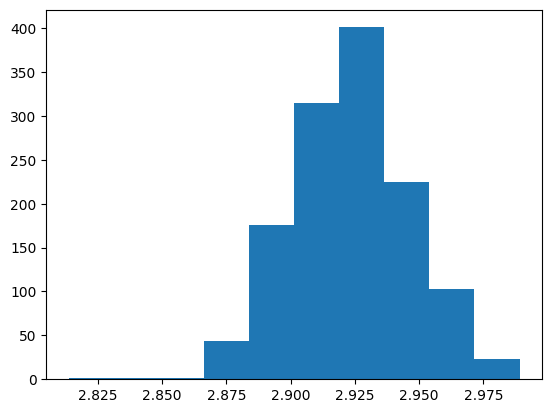

In [89]:
plt.hist(bxcx_price)

In [90]:
normaltest(bxcx_price)

NormaltestResult(statistic=2.7419156530561306, pvalue=0.2538636856916525)

# Data Splitting


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train , X_test, y_train , y_test = train_test_split(X_data, y_data, test_size =0.3 , random_state = 42)

In [93]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (903, 10)
y_train shape : (903,)
X_test shape : (388, 10)
y_test shape : (388,)


In [112]:
boxcox = boxcox(y_train)
y_train_bc = boxcox[0]
lam1 = boxcox[1]
lam1

-0.3441524282487279

In [113]:
normaltest(y_train_bc)

NormaltestResult(statistic=0.25142753227005643, pvalue=0.8818672309271487)

# 3. Linear Regression Models


In [100]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [102]:
s = StandardScaler()
lr = LinearRegression()

In [105]:
X_train_tran = s.fit_transform(X_train)

In [107]:
X_train_tran.shape

(903, 10)

In [114]:
lr.fit(X_train_tran , y_train_bc)

LinearRegression()

In [115]:
X_test_tran = s.fit_transform(X_test)

In [116]:
X_test_tran.shape

(388, 10)

In [125]:
y_test_pred_bc = lr.predict(X_test_tran)
y_train_pred_bc = lr.predict(X_train_tran)

In [126]:
y_test_pred_bc.shape

(388,)

### Inverse BoxCox

In [127]:
from scipy.special import inv_boxcox

In [129]:
y_test_pred= inv_boxcox(y_test_pred_bc,lam1)
y_train_pred = inv_boxcox(y_train_pred_bc, lam1)

In [131]:
y_test_pred[:10]

array([12350.6794971 , 13613.25762051, 17470.45146694, 10624.39119083,
       26152.68101168, 21076.92754149,  9935.5301923 , 13581.0527407 ,
       21127.39101938, 18853.42199266])

#### R^2 Score check

In [132]:
print("R^2 on training  data ",r2_score(y_train_pred, y_train))
print("R^2 on testing data ",r2_score(y_test_pred,y_test))

R^2 on training  data  -4.0971490204233305
R^2 on testing data  -5.459684539056391


## Ridge Regression Using Pipe Line 

In [179]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [180]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)

In [181]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=1))])

In [187]:
predicted_Y=pipe.predict(X_test)
predicted_Y[:10]

array([13733.86413832, 13087.2471346 , 15040.78350062, 10209.65284033,
       34430.12840169, 32877.91022055, 11519.50187544, 13646.73732036,
       18675.09859656, 23567.05049421])

In [188]:
print("R^2 on training  data ",pipe.score(X_train, y_train))
print("R^2 on testing data ",pipe.score(X_test,y_test))

R^2 on training  data  0.6225953725184665
R^2 on testing data  0.514852856019244


In [189]:
param_grid = {
    "polynomial__degree": [1,2,3,4],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]
}

In [190]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)

search.fit(X_train, y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4]})

In [191]:
pd.DataFrame(search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_polynomial__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010466,0.004616,0.002695,0.000397,0.0001,1,"{'model__alpha': 0.0001, 'polynomial__degree': 1}",0.159186,0.250873,0.110936,0.244761,0.104949,0.174141,0.063057,20
1,0.008802,0.002400,0.003107,0.001628,0.0001,2,"{'model__alpha': 0.0001, 'polynomial__degree': 2}",0.465339,0.499733,0.548748,0.606756,0.572296,0.538575,0.050520,7
2,0.028194,0.007538,0.005226,0.002000,0.0001,3,"{'model__alpha': 0.0001, 'polynomial__degree': 3}",-1.247478,0.342367,0.087995,0.457714,0.485683,0.025256,0.651669,22
3,0.122080,0.012961,0.010130,0.001434,0.0001,4,"{'model__alpha': 0.0001, 'polynomial__degree': 4}",-0.668714,-0.567231,-0.347498,-0.037773,-0.634274,-0.451098,0.234933,24
4,0.010280,0.000702,0.004011,0.000029,0.001,1,"{'model__alpha': 0.001, 'polynomial__degree': 1}",0.159187,0.250873,0.110936,0.244761,0.104949,0.174141,0.063057,19


In [192]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best_score_:  0.6377549804708279
best_params_:  {'model__alpha': 10, 'polynomial__degree': 4}


In [195]:
predict = search.predict(X_test)
predict[:10]

array([11406.3583246 ,  8943.09269439, 20315.89239506,  6649.95540781,
       28959.16562316, 28783.39283894, 16087.25718283,  7095.78409345,
       16489.81681876, 27523.54629523])

In [197]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])

In [199]:
predict = best.predict(X_test)
predict[:10]

array([11406.3583246 ,  8943.09269439, 20315.89239506,  6649.95540781,
       28959.16562316, 28783.39283894, 16087.25718283,  7095.78409345,
       16489.81681876, 27523.54629523])

In [200]:
best.score(X_test, y_test)

0.6753296400107265

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
